Model Performance Results
      Metric  Training Set  Testing Set
0       RMSE      0.999687     0.997622
1        MSE      0.999373     0.995250
2        MAE      0.819128     0.809670
3  R-squared      0.003070    -0.008305


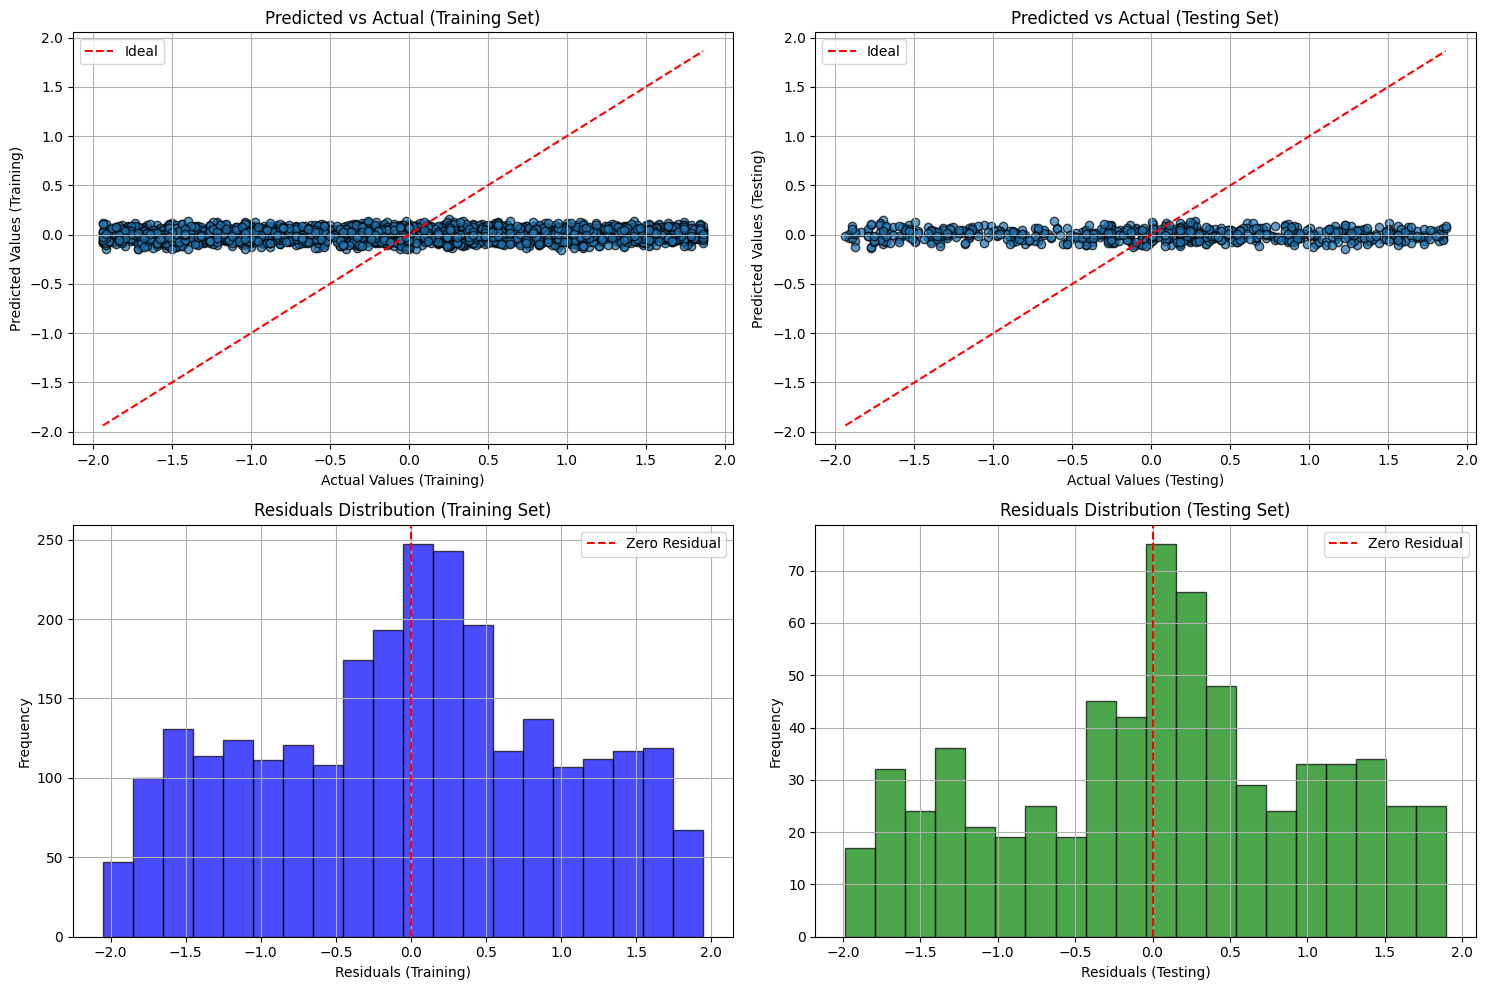

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'Processed_Fashion_Retail_Sales.csv'
data = pd.read_csv(file_path)

# Define features and target variable
features = ['Year', 'Month', 'Weekday', 'Item Purchased Encoded', 'Review Rating', 'Payment Method Encoded']
target = 'Standardized Purchase Amount (USD)'

# Prepare input (X) and target (y)
X = data[features]
y = data[target]

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a Linear Regression model
model = LinearRegression()

# Perform Grid Search for Hyperparameter Tuning
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and retrain the model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions for both training and testing sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Residuals for training and testing sets
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred


# Calculate metrics for the training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for the testing set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create a table of results for training and testing sets
results = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'MAE', 'R-squared'],
    'Training Set': [train_rmse, train_mse, train_mae, train_r2],
    'Testing Set': [test_rmse, test_mse, test_mae, test_r2]
})

# Display the table
print("Model Performance Results")
print(results)


# Create a figure for visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Predicted vs Actual (Training Set)
plt.subplot(2, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7, edgecolor='k')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', label="Ideal")
plt.xlabel("Actual Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Predicted vs Actual (Training Set)")
plt.legend()
plt.grid()

# Plot 2: Predicted vs Actual (Testing Set)
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Ideal")
plt.xlabel("Actual Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("Predicted vs Actual (Testing Set)")
plt.legend()
plt.grid()

# Plot 3: Residuals Distribution (Training Set)
plt.subplot(2, 2, 3)
plt.hist(train_residuals, bins=20, alpha=0.7, color='blue', edgecolor='k')
plt.axvline(0, color='r', linestyle='--', label="Zero Residual")
plt.xlabel("Residuals (Training)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Training Set)")
plt.legend()
plt.grid()

# Plot 4: Residuals Distribution (Testing Set)
plt.subplot(2, 2, 4)
plt.hist(test_residuals, bins=20, alpha=0.7, color='green', edgecolor='k')
plt.axvline(0, color='r', linestyle='--', label="Zero Residual")
plt.xlabel("Residuals (Testing)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Testing Set)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
